# Lab 1 - Working with Data
## Goals of this lab:
  - What is Pandas?
  - Downloading datasets
  - Data exploration

## Recall/prereqs from yesterday:
 - Python review
 - variables as objects, lists, and vectors
 - basic commands
 - writing our own functions
 - basic plotting

In [0]:
# import our vector-manipulation and plotting packages from last time
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

# import the star of today's show:
import pandas as pd
# seaborn is a package for visualizing data built on top of pyplot
import seaborn as sns
sns.set()

# Series

A Pandas **series** is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.).

In [0]:
height_list = [148,165,179,183,166,173]
height_dict = {'Adela':148,'Lee':165,'Raquel':179,'Mark':183,'Nguyen':166,'Phillip':173}

series_based_on_list = pd.Series(height_list)
series_based_on_dict = pd.Series(height_dict)

print('This series was built from a list: \n',series_based_on_list)
print('This series was built from a dict: \n',series_based_on_dict)

These two series differ by the labels assigned to each row, known as the **index** of the series.

In [0]:
print('The index of the list-based series is: \n',series_based_on_list)
print('The index of the dict-based series is: \n',series_based_on_dict)

You can also specify indices manually: compare the following series with the way that we created series_based_on_list.

In [0]:
series_with_manual_indices = pd.Series(height_list,index=height_dict.keys())
print(series_with_manual_indices)

If you don't provide specific indices, the series will be indexed by insertion order (i.e. first-to-last) with integers starting from zero. You can retrieve items based on their index. Even if you provide specific (non-integer) indices, you can also index a series using integers:

In [0]:
# get the first item of the list-based series.
print(series_based_on_list[0])

# get the first item of the dict-based series either by name or position
print(series_based_on_dict['Adela'])
print(series_based_on_dict[0])

# Dataframes

A **DataFrame** is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or dictionary of Series objects.

There are many ways to create dataframes. Each may result in a differently structured dataframe. Here are some using objects we've seen before:

In [12]:
import pandas as pd
# Three different representations of the same data: store the height and favorite color of students in three ways: 
#   Python dictionaries
height_dict = {  'Lee':165,'Adela':148,'Raquel':179,'Mark':183,'Nguyen':166,'Phillip':173}
favorite_color_dict = {'Adela':'green','Lee':'green','Raquel':'red','Mark':'blue','Nguyen':'orange','Phillip':'purple'}

#   Python lists
height_list = list(height_dict.values())
color_list = list(favorite_color_dict.values())

#   Pandas series
height_series = pd.Series(height_dict)
color_series = pd.Series(favorite_color_dict)


In [14]:
df_based_on_dict_of_dicts = pd.DataFrame(
    {
        'height':height_dict,
        'fav_color':favorite_color_dict
    }
)


df_based_on_dict_of_lists = pd.DataFrame(
    {
        'height':height_list,
        'fav_color':color_list
    }
)

df_based_on_dict_of_series = pd.DataFrame(
    {
        'height':height_series,
        'fav_color':color_series
    }
)

print('Df based on dictionary of dictionaries: \n',df_based_on_dict_of_dicts,'\n')
print('Df based on dictionary of lists: \n',df_based_on_dict_of_lists,'\n')
print('Df based on dictionary of series: \n',df_based_on_dict_of_series)

Df based on dictionary of dictionaries: 
          height fav_color
Lee         165     green
Adela       148     green
Raquel      179       red
Mark        183      blue
Nguyen      166    orange
Phillip     173    purple 

Df based on dictionary of lists: 
    height fav_color
0     165     green
1     148     green
2     179       red
3     183      blue
4     166    orange
5     173    purple 

Df based on dictionary of series: 
          height fav_color
Adela       148     green
Lee         165     green
Mark        183      blue
Nguyen      166    orange
Phillip     173    purple
Raquel      179       red


Important things to note:

 - The dfs based on dictionaries and series both automatically matched entries by their "key" value, in this case the name.
 - We didn't specify an index for the df based on lists, so integer indices were used.



# L1.1: Short-answer.

What are the pros and cons of each of the above methods for constructing dataframes? If I re-arranged the order of the entries when I created two dictionaries (i.e. switched whether 'Adela' or 'Mark' was the first entry), would any of these dataframes change?



The dictionary of dictionaries allows for you to store and access entries by a known 'String' value. This is benefical, because when you are matching parallel data structures the corresponding keys will automatically match their values (rearrangeing entries will not affect dataframe). Another benefit of using this data structure is that it maintains order. A con of using a dictionary of dictionaries as oppose to dictionary of Series, is the structure, readability, and performance. 

A dictionary of series also allows for 'String'-paired entries, and automatically preserves matched entry using keys (rearrangeing entries will not affect dataframe). Series are from the pandas libary and are built to perform tasks like these- they even order alphanumerically. A downside of a dictionary of series is that there can only be one data type in a series.

A dictionary of lists is usually created for a number of entries that are related and can be accessed without specific keys. Upon using integer indicies, switching entries will affect/mismatch the dataframe since there is no common key to match entries. A pro of using a dictionary of lists, is that it can be very efficient to sort the lists.

## Okay, but why deal with series and dfs? Why aren't lists or vectors enough?

The key advantage of dataframes is that they let us handle **multiple different kinds of data** at once, and they **organize data for us**.



In [0]:
date_df = pd.date_range("20130101", periods=6)

In [0]:
temperature_data = np.random.normal(scale = 2,size=10)

observations_df = pd.DataFrame(
    {
        'date':pd.date_range("20130101", periods=10),
        'temp (celcius)':temperature_data,
        'humidity':-0.1*temperature_data+np.random.normal(scale = 0.1,size=10)+20,
        'humidity margin of error':np.random.uniform(high=0.1,size=10),
        'weather_conditions':['clear','clear','cloudy','partly cloudy','clear','rain',
                              'clear','cloudy','cloudy','rain'],
        'rainfall (nearest inch)':np.array([0,0,1,0,0,3,0,0,0,2]).astype(int),
    }
)
print(observations_df)

A key advantage is that different columns can have different datatypes:

In [0]:
observations_df.dtypes

## Indexing dataframes

We can retrieve data by row or column:

In [0]:
# this retrieves the first 5 rows
observations_df[0:5]

In [0]:
# this retrieves the column titled 'humidity'
observations_df['humidity']

If we want to retrieve multiple columns, we pass a list of column names.

In [0]:
observations_df[['humidity','rainfall (nearest inch)']]

We can also retrieve more complex data.

Depending on what info you want to extract from the dataframe, there are multiple commands. Here are some basics you'll probably use frequently. What are each of these doing?

In [0]:
observations_df.head()

In [0]:
observations_df.tail()

In [0]:
observations_df.index

In [0]:
observations_df.columns

In [0]:
observations_df.describe()

## Filtering dataframes

Often, we want to pull rows/observations that satisfy a particular set of conditions. This is sometimes referred to as "filtering" the dataframe. Here are several ways to filter a dataframe, depending on what we want to do.

### Logical operations: access the rows of a dataframe for which the given expression evaluates to True

In [0]:
observations_df[observations_df.humidity > 19.7]

Use & for AND, | (vertical bar, not capital i) for OR, and ~ for NOT:

In [0]:
# when using multiple logical statements, using parentheses can help you avoid parse errors
observations_df[(observations_df.humidity > 19.7) & (observations_df.weather_conditions=='rain')]

In [0]:
observations_df[(observations_df.weather_conditions=='clear') | (observations_df['rainfall (nearest inch)']==0)]

In [0]:
observations_df[~(observations_df['rainfall (nearest inch)']==0)]

### A second filtering method: find rows whose values are within a certain list:

In [0]:
bad_weather = ['cloudy','rain']
observations_df[observations_df.weather_conditions.isin(bad_weather)]

### A third filtering method: getting largest/smallest values

In [0]:
observations_df.nlargest(3,'humidity')

In [0]:
observations_df.nsmallest(3,'humidity')

## Performing calculations on data.

What if we want to perform mathematical operations on our data? Some operations we can do directly on the dataframe: usually basic operations.



In [5]:
observations_df = pd.DataFrame(
    {
        'date':pd.date_range("20130101", periods=10),
        'temp (celcius)':temperature_data,
        'humidity':-0.1*temperature_data+np.random.normal(scale = 0.1,size=10)+20,
        'humidity margin of error':np.random.uniform(high=0.1,size=10),
        'weather_conditions':['clear','clear','cloudy','partly cloudy','clear','rain',
                              'clear','cloudy','cloudy','rain'],
        'rainfall (nearest inch)':np.array([0,0,1,0,0,3,0,0,0,2]).astype(int),
    }
)
observations_df['humidity'] > 0.5

NameError: name 'temperature_data' is not defined

In [0]:
5*observations_df['humidity']

In [0]:
observations_df['humidity'] - observations_df['humidity margin of error']

In [0]:
np.mean(observations_df['humidity'])

In [0]:
max(observations_df['humidity'])

## Numpy and Pandas

For more complicated mathematical operations, we may need to turn subsets of our dataframes into numpy arrays in order to perform calculations. Luckily, this is easy: you can turn any column or data series into a numpy array via to_numpy()

In [0]:
observations_df['temp (celcius)'].to_numpy()

In [0]:
series_based_on_dict.to_numpy()

# Applying functions

Sometimes we're interested in some transformation or function of the recorded variables, rather than the raw data itself. Pandas makes it easy to efficiently apply functions to each row and store the result as a new variable: say we want the temperature in degrees Farenheit:

In [0]:
def celcius_to_farenheit(temp_c):
    return 32+1.8*temp_c

observations_df['temp (farenheit)'] = observations_df['temp (celcius)'].apply(celcius_to_farenheit)
observations_df.head()

# Visualization

Since seaborn is built on top of pyplot, but is designed to make it much easier to use information in a dataframe to create your plots. Here are some basic examples:

In [0]:
sns.relplot(data=observations_df, kind="line", x="date", y="humidity")

In [0]:
sns.relplot(data=observations_df, x='temp (celcius)', y='humidity',hue='weather_conditions')

# L1.2: data manipulation and exploration in pandas.

Load the penguins dataset we started exploring in class. Answer the following questions. The first four are intended to be short. Spend some time thinking about **(e)** and **(f)**.

###### (a) What are the largest and smallest flipper sizes documented in the dataset?

###### (b) On average, which species of penguin is the largest by mass?

###### (c) Which island has the largest population of Adelie penguins?

###### (d) Calculate approximate measurements in inches.

Suppose we have an American collaborator who asks for our measurements in inches. Define and apply a function to create new variables for bill depth, length, and flipper length in inches.

###### (e) Distinguishing different species.

We have four quantitative measurements about our penguins (bill_length, bill_depth, flipper_length, body_mass) in addition to info about which island they inhabit. Visualize some of these quantitative measurements, coloring points according to penguin species. Imagine you are a scientist who does not have access to the "species" variable: how would you try to predict the species of a particular penguin?

###### (f) Short answer; propose some problems.

You've now done a bit of poking around with this dataset, and have a better understanding of what it contains. Are there any interesting research questions you think you could try to answer using this data? Do you have any hypotheses you think you could test using the information it contains? If not, what additional information would you need to answer your research questions? You don't need to actually perform these analyses, just explain what problem you'd be interested and how this data (or additional data) might help you explore the question.

In [6]:
#imports/setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
penguins_data = pd.read_csv('penguins.csv')

In [78]:
#part A

#using .min() and .max() to find largest and smallest flipper_length_mm
print("\nSummary:\nMax: " + str(penguins_data["flipper_length_mm"].max()))
print("Min: " + str(penguins_data["flipper_length_mm"].min()))


Summary:
Max: 231.0
Min: 172.0


In [77]:
#part B
species = penguins_data['species'].value_counts().keys()
maximum = 0
maxSpec = ""

#looping through penguin types to find max
for x in range(len(species)):
    current = penguins_data[penguins_data.species == species[x]]
    if(current.describe().body_mass_g["mean"] > maximum):
        maximum = current.describe().body_mass_g["mean"]
        maxSpec = species[x]

#printing max
print("\nMaximum = " + str(maximum) + ", by " + maxSpec)


Maximum = 5076.016260162602, by Gentoo


In [91]:
#part C
islands = penguins_data['island'].value_counts().keys()
maximum = 0
maxIsland = ""

#looping through island types to find max Adelies
for x in range(len(islands)):
    current = penguins_data[penguins_data.island == islands[x]]
    current = current[current.species == "Adelie"]
    if (len(current) > maximum):
        maxIsland = islands[x]
        maximum = len(current)

#print max
print("\nMaximum = " + str(maximum) + ", by " + maxIsland)


Maximum = 56, by Dream


In [114]:
#part D

#function to convert from mm to inches
def mm_to_inch(mm):
    return (mm/25.4)

#looking for col names
keys = penguins_data.keys()

#looping through keys - if they end in mm, making in inches column and applying if it does
for x in range(len(keys)):
    if(str(keys[x][-2:]).lower() == "mm"):
        penguins_data[str(keys[x][:-2]) + "in"] = penguins_data[str(keys[x])].apply(mm_to_inch)
   

#printing new columns to confirm that new cols have been created/applied
print(penguins_data.keys())

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'bill_length_in',
       'bill_depth_in', 'flipper_length_in'],
      dtype='object')


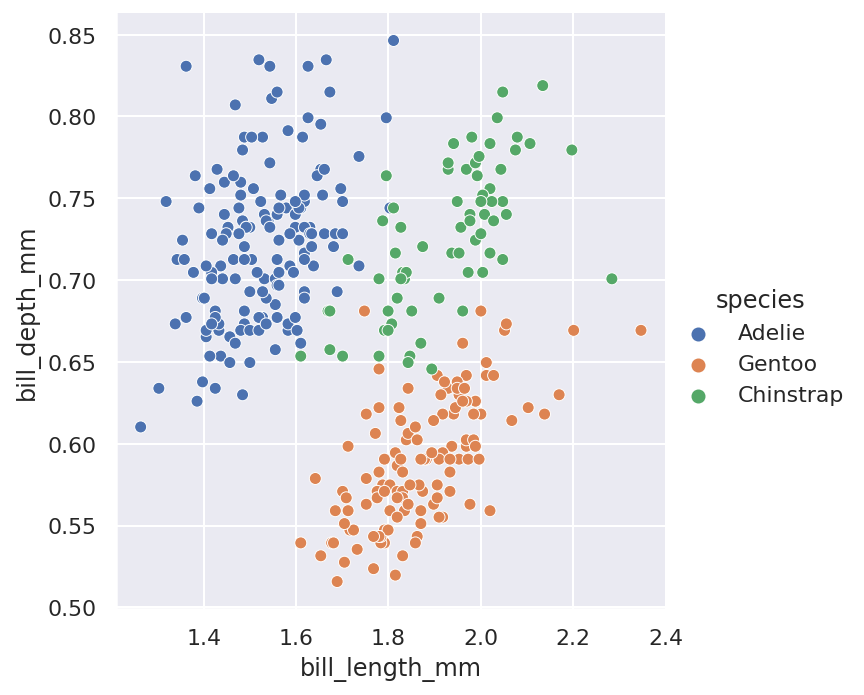

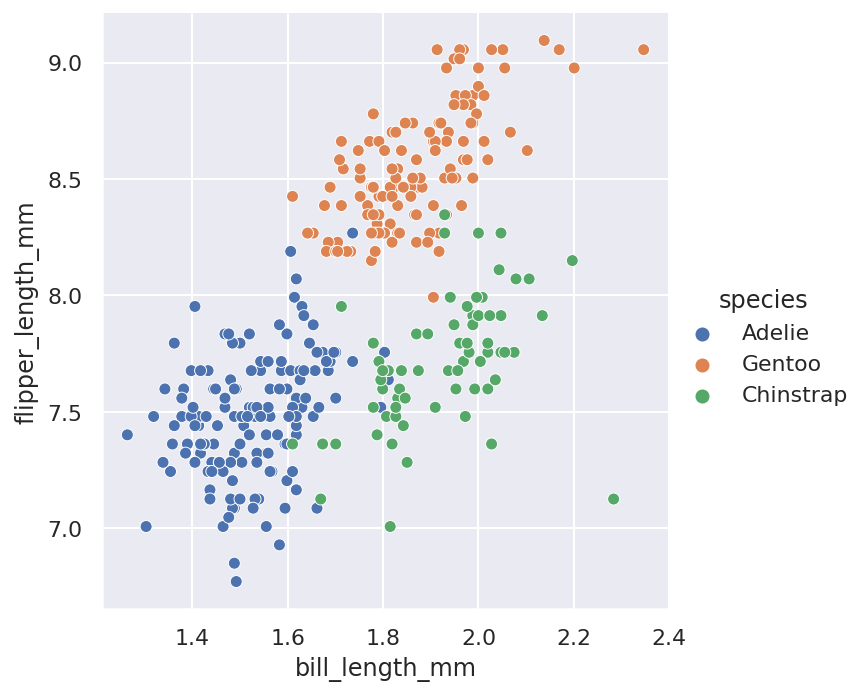

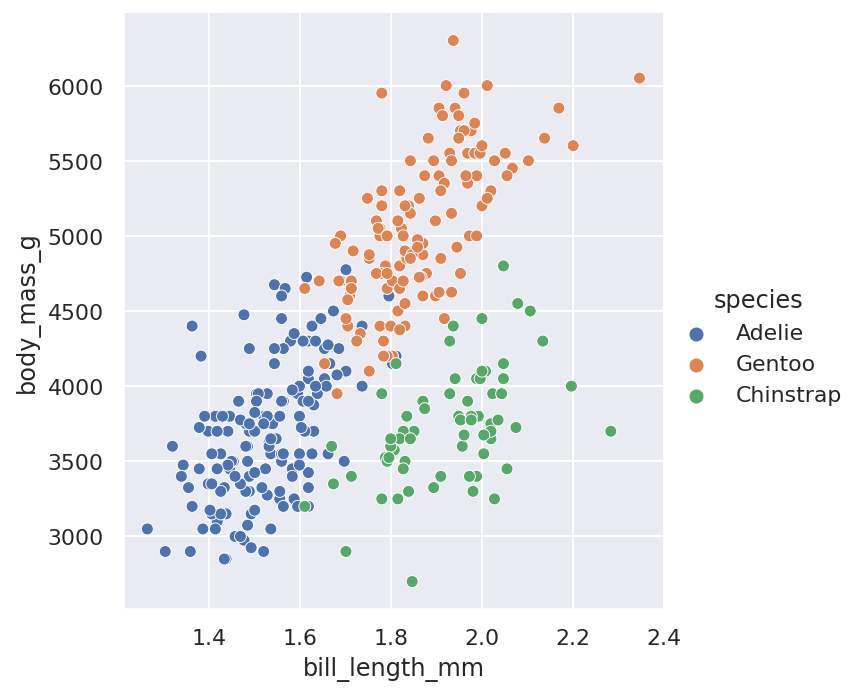

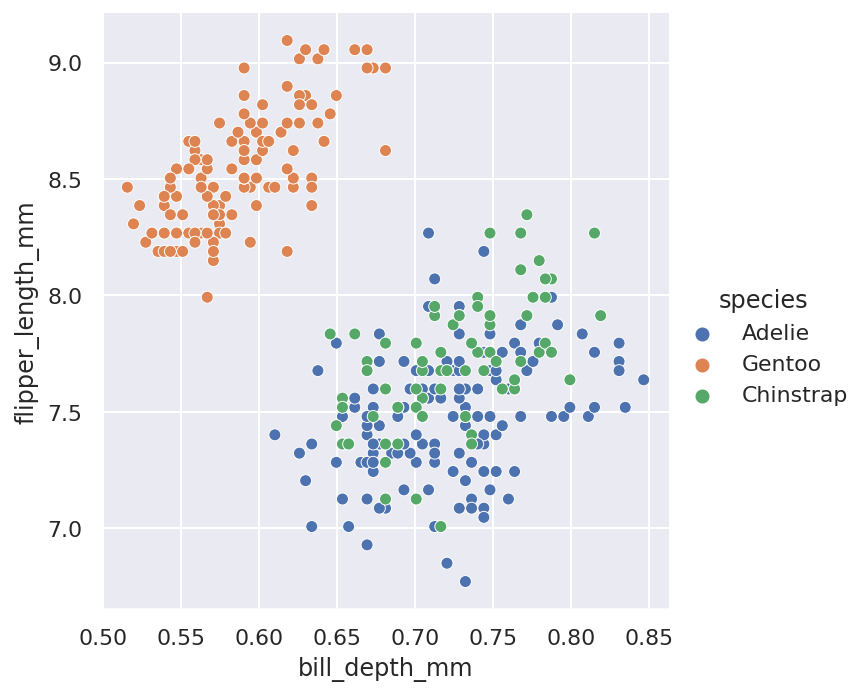

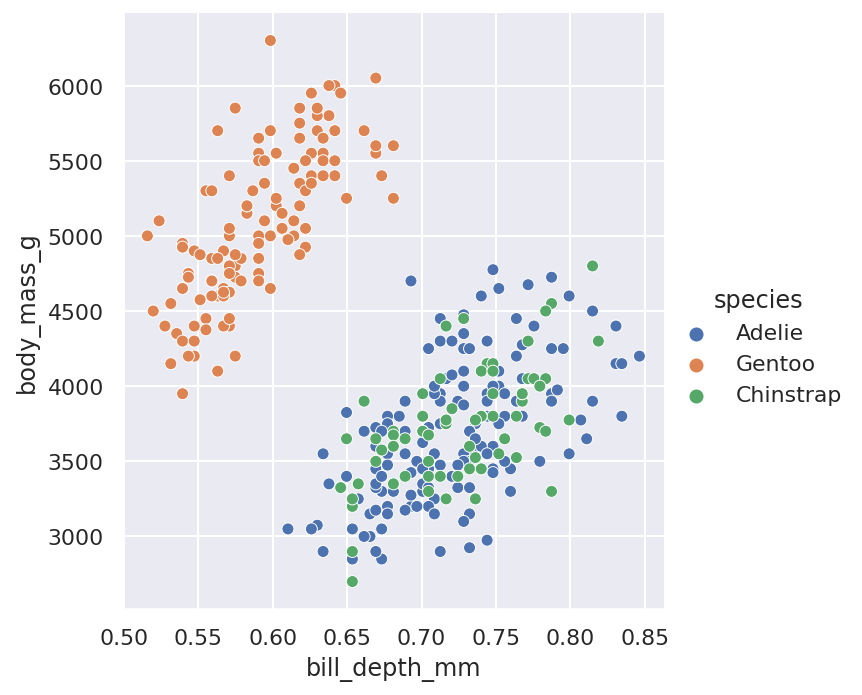

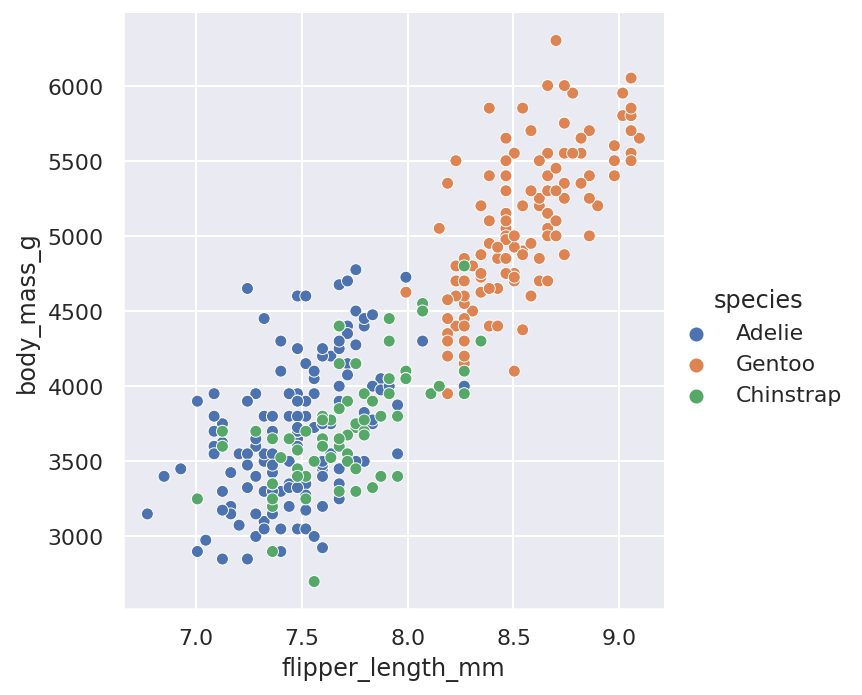

In [119]:
#part E
quantative_measurements = ['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g']

for x in range(len(quantative_measurements)):
    for y in range(x+1, len(quantative_measurements)):
        sns.relplot(data=penguins_data, x=quantative_measurements[x], y=quantative_measurements[y],hue='species')
"""
From the Graphs, it is apparent that 
- Adelles can be characterized by: 
       -small bill lengths AND
       -large bill depths OR small flipper lengths OR small body mass 
- Gentoos can be characterized by: 
       -average bill length AND
       -small bill depth OR large flipper lengths OR large body mass 
- Chinstraps can be characterized by: 
       -average bill length AND
       -large bill depth OR average flipper length OR small body mass g
"""


part f:

My research question\- 

The Gentoo is a very interesting species in that its bill depth is extremely small in proportion to its other physical traits. Its body mass, flipper length, and bill length are all very large, whereas , the bill depth of the species is the smallest on average. Why could this be and does this have anything to do with a penguin development\- is the gentoo species the most developed species? Has it found a way to maximize eating habits by having a small beak and eat more \(to grow physically\)?
